In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data = data.iloc[:, 1:]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


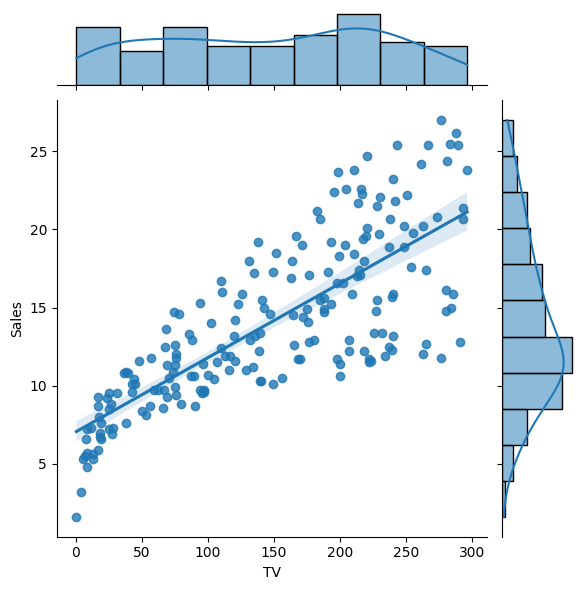

In [5]:
sns.jointplot(x='TV', y='Sales', data=data, kind='reg')

In [10]:
X = data[['TV']]
y = data['Sales']

In [11]:
model = LinearRegression()

In [12]:
model.fit(X,y)

LinearRegression()

In [13]:
model

LinearRegression()

In [15]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',

In [16]:
model.coef_ 

array([0.04753664])

In [17]:
model.intercept_ # y = 7.032 + 0.047 * x

7.032593549127695

In [18]:
model.score(X, y) # R^2

0.611875050850071

### Predict

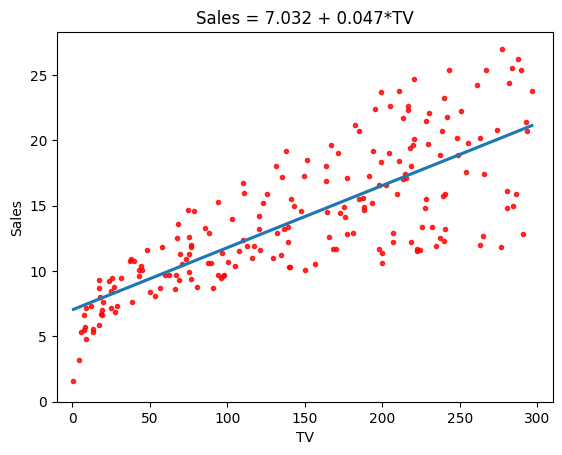

In [28]:
g = sns.regplot(x='TV', y='Sales', data=data,ci=None, scatter_kws={'color':'r', 's':9})
g.set_title('Sales = 7.032 + 0.047*TV')
g.set_ylabel('Sales')
g.set_xlabel('TV')
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [30]:
model.predict([[300]]) # 21.29358568

c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.29358568])

In [31]:
model.predict([[165]]) # 7.03259355

c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.87613922])

In [32]:
seri = [[5],[15],[25]]
model.predict(seri)

c:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7.27027675, 7.74564316, 8.22100956])

## ARTIKLAR ve ML ÖNEMİ

- MSE : Hata Kareler Ortalaması
- RMSE : Hata Kareler Ortalamasının Kökü

In [34]:
y.head(10)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: Sales, dtype: float64

In [35]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [36]:
hatalar = pd.concat([y, pd.Series(model.predict(X))], axis=1)

In [39]:
hatalar.columns = ['gercek', 'tahmin']
hatalar

,gercek,tahmin
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
...,...,...
195,7.6,8.848493
196,9.7,11.510545
197,12.8,15.446579
198,25.5,20.513985


In [40]:
hatalar['hata'] = hatalar['gercek'] - hatalar['tahmin']
hatalar

,gercek,tahmin,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
...,...,...,...
195,7.6,8.848493,-1.248493
196,9.7,11.510545,-1.810545
197,12.8,15.446579,-2.646579
198,25.5,20.513985,4.986015


In [41]:
hatalar['hata_kare'] = hatalar['hata'] ** 2
hatalar

,gercek,tahmin,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
...,...,...,...,...
195,7.6,8.848493,-1.248493,1.558735
196,9.7,11.510545,-1.810545,3.278073
197,12.8,15.446579,-2.646579,7.004380
198,25.5,20.513985,4.986015,24.860348
